In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("Downloads/StudentsPerformance.csv")

In [6]:
print(data.head())

data.describe()

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [130]:
data.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [22]:
math = data['math score'].head(200)
read = data['reading score'].head(200)

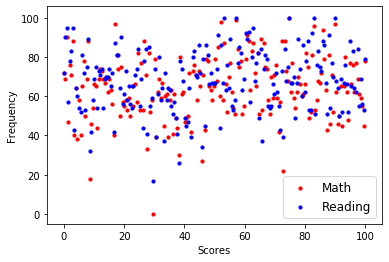

In [40]:
score = np.linspace(0,100,200)

plt.scatter(score, math, c='red',s=10, label="Math")
plt.scatter(score, read, c='blue',s=10, label='Reading')

plt.xlabel("Scores",size=10); plt.ylabel("Frequency")

plt.legend(prop={"size":12})

In [54]:
np.polyfit(math,read,1)

array([ 0.85257055, 12.87750214])

In [132]:
#Finding all prediction models

f = []
polymodel = []

for i in range(1,3+1):
    polymodel.append((np.polyfit(math,read,i)))
    f.append(np.poly1d(polymodel[i-1]))
    print(f[i-1])

 
0.8526 x + 12.88
           2
0.0002861 x + 0.8175 x + 13.88
            3            2
-5.204e-05 x + 0.008917 x + 0.3956 x + 19.43


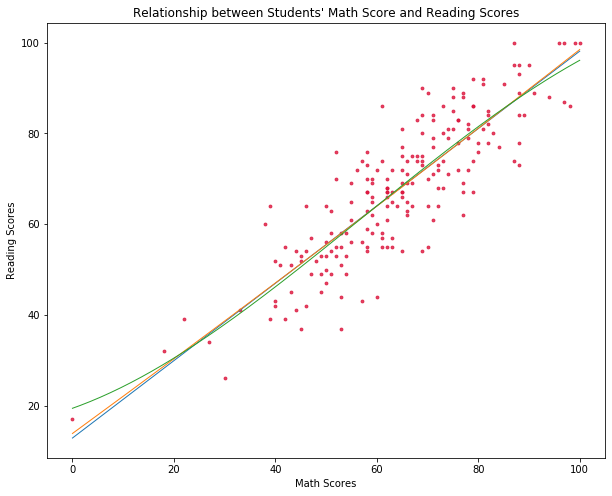

In [133]:
plt.figure(figsize=(10,8))

plt.scatter(math,read,s=8,c='crimson',alpha=0.8)
plt.xlabel("Math Scores"); plt.ylabel("Reading Scores")
plt.title("Relationship between Students' Math Score and Reading Scores")

xx = np.linspace(0,100,200)

for i in range(len(f)):
    plt.plot(xx,f[i](xx),lw=1)

In [134]:
r_list = []

for x in range(len(f)):
    r_list.append((np.corrcoef(read,f[x](xx)))[0][1])
    
print(f"Most accurate prediction model is\n {f[r_list.index(max(r_list))]} \nWith an r_value of {max(r_list)}")

Most accurate prediction model is
             3            2
-5.204e-05 x + 0.008917 x + 0.3956 x + 19.43 
With an r_value of 0.1201684520337992
